<a href="https://colab.research.google.com/github/TranHaoDong/BT_AI_WEEK9-15/blob/main/Rice_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder = '/content/drive/MyDrive/Rice_Disease/train/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('Brown_Spot'):
    output= 1
  if file.startswith('Healthy'):
    output= 2
  if file.startswith('Hispa'):
    output= 3
  if file.startswith('Leaf_Blast'):
    output= 4
  if file.startswith('Neck_Blast'):
    output= 5
  photo = load_img(folder + file, target_size= (100,100))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Rice_Disease/rice_disease_photos.npy', photos)
save('/content/drive/MyDrive/Rice_Disease/rice_disease_labels.npy', labels)

(5380, 100, 100, 3) (5380,)


In [4]:
import numpy as np
# Load images and labels
photos = np.load('/content/drive/MyDrive/Rice_Disease/rice_disease_photos.npy')
labels = np.load('/content/drive/MyDrive/Rice_Disease/rice_disease_labels.npy')

# Split data into train & test
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [5]:
print(train_x.shape, test_x.shape)

(4842, 100, 100, 3) (538, 100, 100, 3)


In [6]:
test_x = test_x.reshape((538, 100, 100, 3))
train_x = train_x.reshape((4842, 100, 100, 3))
test_x = test_x.astype('float32')/255
train_x = train_x.astype('float32')/255

In [7]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,6)
test_y = to_categorical(test_y,6)

In [8]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 32
epochs =40
classes = 6

In [9]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (100, 100, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [10]:

from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(256, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [11]:
from keras.preprocessing.image import ImageDataGenerator
#Compile:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)
#train model
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
152/152 [==============================] - 13s 26ms/step - loss: 1.2571 - accuracy: 0.4769
Epoch 2/40
152/152 [==============================] - 4s 28ms/step - loss: 0.9848 - accuracy: 0.5824
Epoch 3/40
152/152 [==============================] - 4s 25ms/step - loss: 0.9225 - accuracy: 0.6082
Epoch 4/40
152/152 [==============================] - 3s 21ms/step - loss: 0.8415 - accuracy: 0.6559
Epoch 5/40
152/152 [==============================] - 3s 19ms/step - loss: 0.8186 - accuracy: 0.6780
Epoch 6/40
152/152 [==============================] - 3s 21ms/step - loss: 0.7382 - accuracy: 0.7030
Epoch 7/40
152/152 [==============================] - 3s 19ms/step - loss: 0.6474 - accuracy: 0.7439
Epoch 8/40
152/152 [==============================] - 3s 19ms/step - loss: 0.5993 - accuracy: 0.7648
Epoch 9/40
152/152 [==============================] - 3s 19ms/step - loss: 0.5340 - accuracy: 0.7949
Epoch 10/40
152/152 [==============================] - 3s 20ms/step - loss: 0.4969 - accur

In [12]:
model.save('/content/drive/MyDrive/Rice_Disease/Rice_disease.h5')

In [13]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

17/17 [==============================] - 1s 25ms/step - loss: 1.7406 - accuracy: 0.9145
Test accuracy: 0.9144981503486633


1/1 [==============================] - 0s 21ms/step
Healthy


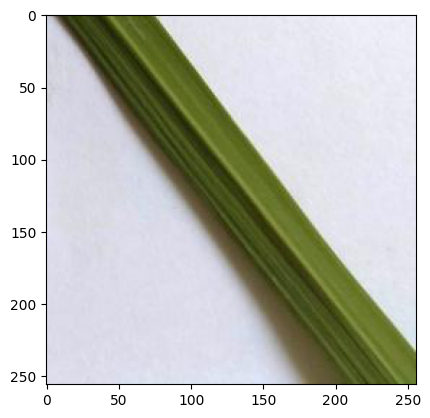

1/1 [==============================] - 0s 20ms/step
Neck_Blast


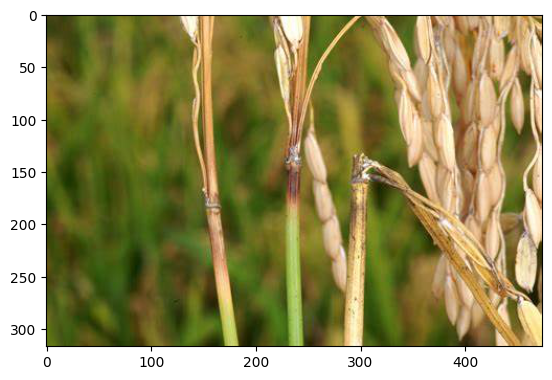

1/1 [==============================] - 0s 23ms/step
Brown_Spot


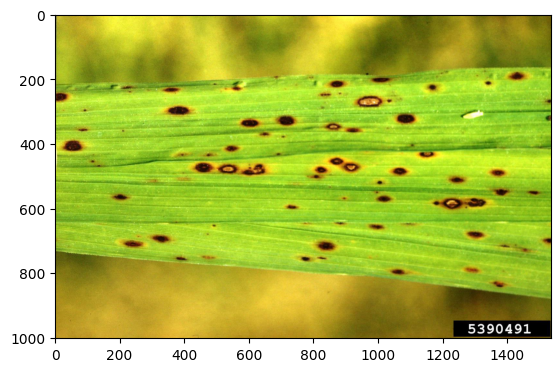

1/1 [==============================] - 0s 53ms/step
Leaf_Blast


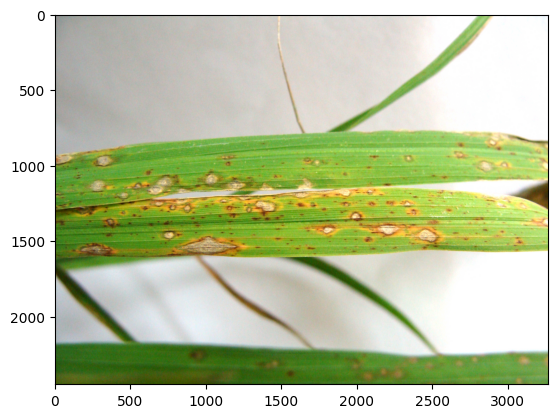

1/1 [==============================] - 0s 26ms/step
Hispa


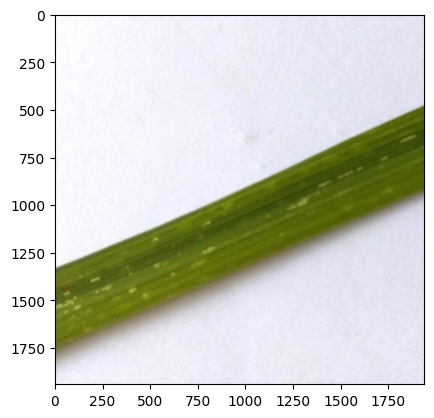

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Rice_Disease/test/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (100, 100))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','Brown_Spot', 'Healthy', 'Hispa', 'Leaf_Blast', 'Neck_Blast']
  print(class_name[result])
  plt.show()